In [959]:
from numpy import *
import pandas as pd
import xarray
import netCDF4 as nc
import matplotlib.pyplot as plt
from pandas.errors import EmptyDataError
import numpy as np
import seaborn as sns

In [ ]:
# reads in LH observations and concatenates into dataframe l
import os
count=0
l=[]
names=[]
directory = os.fsencode(r"C:\Users\andersg\george_LHF_observation")

# loop through each file and reads in data (for each site)
for file in os.listdir(directory):
    try:
        
        f = os.path.join(directory, file) # gives full path of file
        f=f.decode('UTF-8') # turns into string
        data=pd.read_csv(f,delim_whitespace=True)
        l.append(data)
        name=str(file)
        name=name[5:11] # gets name of station
        names.append(name)
        count=count+1
    except EmptyDataError:
        continue

for i in range(0,len(l)):
    #fills names in for all datapoints and concats
    tower=pd.Series([names[i]]*len(l[i]))
    l[i]=pd.concat([tower,l[i]],axis=1)
    

l=pd.concat(l)
l.columns=["NAME","TIMESTAMP","LE_CORR"]
l

In [1015]:
l

,NAME,TIMESTAMP,LE_CORR
0,AT-Neu,20020101,0.968292
1,AT-Neu,20020102,1.807510
2,AT-Neu,20020103,0.937631
3,AT-Neu,20020104,1.876970
4,AT-Neu,20020105,2.645910
...,...,...,...
6204,RU-Fyo,20141227,0.388689
6205,RU-Fyo,20141228,0.199804
6206,RU-Fyo,20141229,-0.654400
6207,RU-Fyo,20141230,0.422750


In [ ]:

# same loop to get the names of the files that are empty (I didn't really use this)

#### get a list of files in data directory
data_dir = r"C:\Users\andersg\george_LHF_observation"
files_list = os.listdir(data_dir)


#### result containers
good_files = []
bad_files = []

count1=0
#### iterate files in directory
for one_file in files_list:
    print(f"Parsing: {one_file}")
    try:
        count1=count1+1
        #### read csv file to pandas data frame
        #one_file.decode('UTF-8')
        f = os.path.join(data_dir,one_file)
        df = pd.read_csv(f, low_memory=False)
        #### append the file name to a list of good files
        good_files.append(one_file)
        # ...
    except EmptyDataError:
        print(f"No columns to parse from file {one_file}")
        bad_files.append(one_file)
print('Done parsing.')
print(count1)

In [ ]:
# good_files becomes list of names of observation stations with data (I didn't really use this)
for i in range(0,len(good_files)-1):
    good_files[i]=good_files[i][0:9]
    
good_files

In [ ]:
# reads in files from george_data (HOLAPS data)
path = os.fsencode(r"C:\Users\andersg\george_data")
temp=[]
HOLAPS_filename=[]
count=0
for file in os.listdir(path):
    
    try:
        f = os.path.join(path, file)
        f=f.decode('UTF-8')
        data1=nc.Dataset(f)
        
        file_name=str(f)
        length=len(file_name)
        file_name=file_name[length-9:length-3] # gets station name
        print(file_name)
        HOLAPS_filename.append(file_name)
        
        # gets time with time interval of 1 
        col_time=np.array(data1['time'])
        col_time=col_time.astype(int)
        col_time=np.unique(col_time)
        col_name=np.array([str(file_name)]*len(col_time))
        col_lon=[np.array(data1['lon'])[0]]*len(col_time)
        col_lat=[np.array(data1['lat'])[0]]*len(col_time)
        # name of new variable
        var1=list(data1.variables.items())[3][0]
        # gets matching data for whole timestep
        ind=np.array(data1['time'])[:]%1==0
        col_var=np.array(data1[var1])
        # gets rid of array notation for individual entries
        col_var=col_var[:,0,0]
        # gets variable readings that occur only on whole timestep
        col_var=col_var[ind]
        
        #temp becomes a list of dataframes for each variable
        df1=pd.DataFrame([col_name,col_time,col_lon,col_lat,col_var]).transpose()
        df1=df1.dropna()
        df1.columns=['NAME','TIMESTAMP','lon','lat',var1]
        temp.append(df1)
        count=count+1
        print(count)
    except EmptyDataError:
        continue

In [1016]:
temp

[        NAME TIMESTAMP      lon      lat ground_heat_flux
 0     AT-Neu  20010101  11.3175  47.1167       -68.783463
 1     AT-Neu  20010102  11.3175  47.1167        16.963678
 2     AT-Neu  20010103  11.3175  47.1167        21.207169
 3     AT-Neu  20010104  11.3175  47.1167       -36.514149
 4     AT-Neu  20010105  11.3175  47.1167       -21.162354
 ...      ...       ...      ...      ...              ...
 2186  AT-Neu  20061227  11.3175  47.1167       -34.030312
 2187  AT-Neu  20061228  11.3175  47.1167       -39.043991
 2188  AT-Neu  20061229  11.3175  47.1167       -19.428768
 2189  AT-Neu  20061230  11.3175  47.1167       -43.582634
 2190  AT-Neu  20061231  11.3175  47.1167       -27.056404
 
 [2191 rows x 5 columns],
         NAME TIMESTAMP     lon      lat ground_heat_flux
 0     BE-Bra  20010101  4.5198  51.3076        22.213322
 1     BE-Bra  20010102  4.5198  51.3076        19.130367
 2     BE-Bra  20010103  4.5198  51.3076        13.622385
 3     BE-Bra  20010104  4.5198 

In [ ]:
# experimenting for getting the loop above (same in cells below)
tas = nc.Dataset('C:/Users/andersg/george_data/george_HOLAPS_Td_IT-Lav.nc')
col_time=np.array(tas['time']).astype(int)
col_time=np.unique(col_time)
# calculate mean
col_name=np.array(["IT-Lav"]*len(col_time))
col_lon=[np.array(tas['lon'])[0]]*len(col_time)
col_lat=[np.array(tas['lat'])[0]]*len(col_time)
col_t=np.array(tas['deep_soil_temperature'])
col_t=col_t[:,0,0]
list2=[[col_time],[col_lon],[col_lat],[col_t]]

In [ ]:
odds=np.array(tas['time'])[np.array(tas['time'])[:]%2==1.0]
evens=np.array(tas['time'])[np.array(tas['time'])[:]%2==0]
len(np.sort(np.concatenate((odds,evens), axis=None)))

In [ ]:
ind=np.array(tas['time'])[:]%1==0
len(ind[ind==True])
test=np.array(tas['deep_soil_temperature'])
test=test[:,0,0]
len(test[ind[:]==True])

In [ ]:
len(np.unique(np.array(tas['time']).astype(int)))

In [ ]:
pd.merge(pd.concat([temp[0],temp[1]]),pd.concat([temp[62],temp[63]]))

In [ ]:
pd.concat([pd.concat([temp[0],temp[1]]),pd.concat([temp[3],temp[2]])])

In [ ]:
# indexing on right is non-inclusive, indexing on left side is
temp[0:62]

In [ ]:
temp[62]

In [ ]:
temp[62:75]

In [ ]:
# concats dataframes into another list of dataframes, one entry for each variable
list1=[]
start_ind=0
for i in range(0,len(temp)-1,2):
    
    if(i==0):
        continue
    # checks to see if previous/next file uses a different variable
    if(temp[i].columns[4]!=temp[i-1].columns[4]):
        list1.append(pd.concat(temp[start_ind:i]))
        start_ind=i
    elif(temp[i].columns[4]!=temp[i+1].columns[4]):
        list1.append(pd.concat(temp[start_ind:i+1]))
        start_ind=i+1
    elif(i==812):
        list1.append(pd.concat(temp[start_ind:i+2]))

In [1017]:
list1

[        NAME TIMESTAMP      lon      lat ground_heat_flux
 0     AT-Neu  20010101  11.3175  47.1167       -68.783463
 1     AT-Neu  20010102  11.3175  47.1167        16.963678
 2     AT-Neu  20010103  11.3175  47.1167        21.207169
 3     AT-Neu  20010104  11.3175  47.1167       -36.514149
 4     AT-Neu  20010105  11.3175  47.1167       -21.162354
 ...      ...       ...      ...      ...              ...
 5108  RU-Fyo  20141227  32.9221  56.4615        -3.395344
 5109  RU-Fyo  20141228  32.9221  56.4615       -61.049129
 5110  RU-Fyo  20141229  32.9221  56.4615       -22.813641
 5111  RU-Fyo  20141230  32.9221  56.4615         0.779453
 5112  RU-Fyo  20141231  32.9221  56.4615        -0.860936
 
 [264410 rows x 5 columns],
         NAME TIMESTAMP      lon      lat surface_upward_sensible_heat_flux
 0     AT-Neu  20010101  11.3175  47.1167                         35.222637
 1     AT-Neu  20010102  11.3175  47.1167                          1.639309
 2     AT-Neu  20010103  11.3175  

In [ ]:
for i in range(0,len(temp)-1):
    if(temp[i].columns[4]!=temp[i+1].columns[4]):
        print(temp[i+1].columns[4])

In [ ]:
pd.merge(pd.merge(list1[3],list1[4]),pd.merge(list1[0],list1[1]))

In [896]:
# merges the dataframes from list1 into one big dataframe with all variables
ex1=pd.merge(pd.merge(list1[0],list1[1]),pd.merge(list1[3],list1[4]))
ex2=pd.merge(pd.merge(list1[5],list1[6]),pd.merge(list1[7],list1[8]))
result=pd.merge(pd.merge(ex1,ex2),l)
result

,NAME,TIMESTAMP,lon,lat,ground_heat_flux,surface_upward_sensible_heat_flux,precipitation_flux,surface_downwelling_shortwave_flux_in_air,soil_moisture_for_specific_layer,air_temperature,deep_soil_temperature,surface_temperature,LE_CORR
0,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.303848,253.18895,259.15094,254.742035,0.968292
1,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.305902,253.18895,259.15094,254.742035,0.968292
2,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.307437,253.18895,259.15094,254.742035,0.968292
3,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.310782,253.18895,259.15094,254.742035,0.968292
4,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.32428,253.18895,259.15094,254.742035,0.968292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553315,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.303282,256.954865,258.15152,255.753143,-1.604540
553316,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.307226,256.954865,258.15152,255.753143,-1.604540
553317,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.314123,256.954865,258.15152,255.753143,-1.604540
553318,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.324179,256.954865,258.15152,255.753143,-1.604540


In [897]:
print(f'Dataset contains {len(result)} datapoints.')

Dataset contains 553320 datapoints.


In [898]:
print(f'Dataset contains measurements from {result.TIMESTAMP.min()} to {result.TIMESTAMP.max()}.')

Dataset contains measurements from 20010101 to 20141231.


In [937]:
result.dtypes

NAME                                          object
TIMESTAMP                                     object
lon                                           object
lat                                           object
ground_heat_flux                              object
surface_upward_sensible_heat_flux             object
precipitation_flux                            object
surface_downwelling_shortwave_flux_in_air     object
soil_moisture_for_specific_layer              object
air_temperature                               object
deep_soil_temperature                         object
surface_temperature                           object
LE_CORR                                      float64
dtype: object

In [910]:
len(result[result['precipitation_flux'][:]==0])

430220

In [ ]:
result.drop()

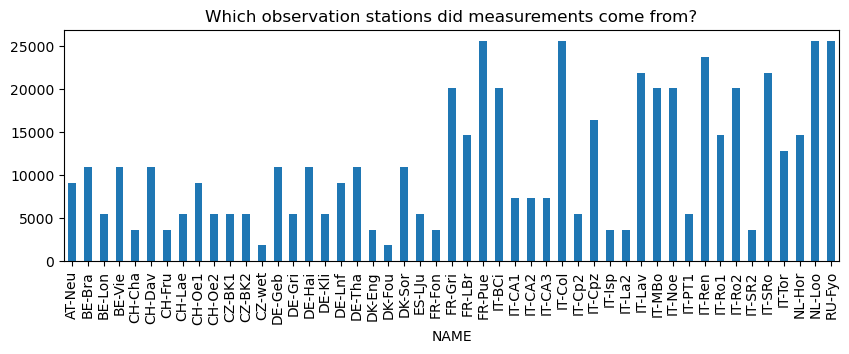

In [913]:
result.groupby('NAME').size().plot.bar(title='Which observation stations did measurements come from?',
                                            figsize=[10,3]);

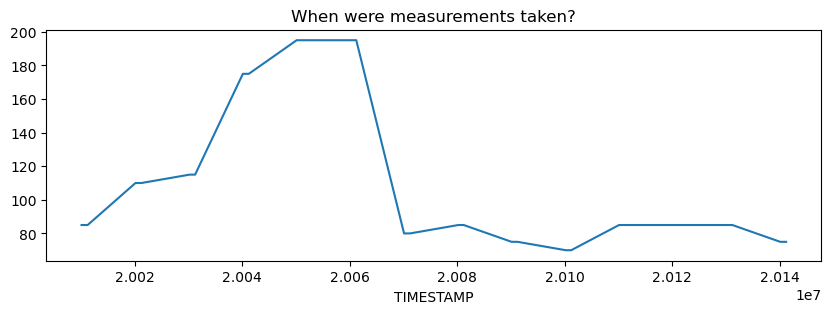

In [914]:
result.groupby('TIMESTAMP').size().plot(title='When were measurements taken?',
                                     figsize=[10,3]);

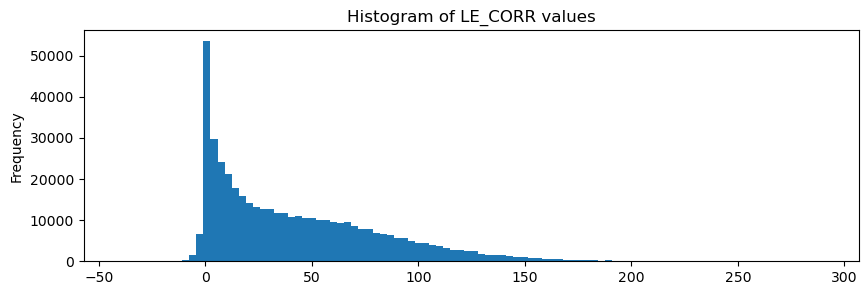

In [956]:
result.LE_CORR.plot.hist(bins=100, figsize=[10,3],
                                    title='Histogram of LE_CORR values');

In [934]:
result=result[result['LE_CORR']>-500]


In [952]:
result[result['surface_downwelling_shortwave_flux_in_air']==0.0]

,NAME,TIMESTAMP,lon,lat,ground_heat_flux,surface_upward_sensible_heat_flux,precipitation_flux,surface_downwelling_shortwave_flux_in_air,soil_moisture_for_specific_layer,air_temperature,deep_soil_temperature,surface_temperature,LE_CORR
0,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.303848,253.18895,259.15094,254.742035,0.968292
1,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.305902,253.18895,259.15094,254.742035,0.968292
2,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.307437,253.18895,259.15094,254.742035,0.968292
3,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.310782,253.18895,259.15094,254.742035,0.968292
4,AT-Neu,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.0,0.32428,253.18895,259.15094,254.742035,0.968292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553315,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.303282,256.954865,258.15152,255.753143,-1.604540
553316,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.307226,256.954865,258.15152,255.753143,-1.604540
553317,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.314123,256.954865,258.15152,255.753143,-1.604540
553318,RU-Fyo,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.0,0.324179,256.954865,258.15152,255.753143,-1.604540


In [946]:
# drops entries where that contain -99999 values 
result.drop(result[result.isin([-9999999.0]).any(axis=1)].index, inplace=True) 

C:\Users\andersg\AppData\Local\Temp\ipykernel_19324\3047677064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop(result[result.isin([-9999999.0]).any(axis=1)].index, inplace=True)


In [954]:
result=result.drop(columns=['surface_downwelling_shortwave_flux_in_air'], axis=1) # variable contains no info

In [955]:
dataset=result.drop(columns=['NAME'], axis=1)
dataset

,TIMESTAMP,lon,lat,ground_heat_flux,surface_upward_sensible_heat_flux,precipitation_flux,soil_moisture_for_specific_layer,air_temperature,deep_soil_temperature,surface_temperature,LE_CORR
0,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.303848,253.18895,259.15094,254.742035,0.968292
1,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.305902,253.18895,259.15094,254.742035,0.968292
2,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.307437,253.18895,259.15094,254.742035,0.968292
3,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.310782,253.18895,259.15094,254.742035,0.968292
4,20020101,11.3175,47.1167,-36.829296,8.932383,0.0,0.32428,253.18895,259.15094,254.742035,0.968292
...,...,...,...,...,...,...,...,...,...,...,...
553315,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.303282,256.954865,258.15152,255.753143,-1.604540
553316,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.307226,256.954865,258.15152,255.753143,-1.604540
553317,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.314123,256.954865,258.15152,255.753143,-1.604540
553318,20141231,32.9221,56.4615,-0.860936,-28.862446,0.0,0.324179,256.954865,258.15152,255.753143,-1.604540


In [969]:
dataset=dataset.apply(pd.to_numeric)

In [970]:
dataset.dtypes

TIMESTAMP                              int64
lon                                  float64
lat                                  float64
ground_heat_flux                     float64
surface_upward_sensible_heat_flux    float64
precipitation_flux                   float64
soil_moisture_for_specific_layer     float64
air_temperature                      float64
deep_soil_temperature                float64
surface_temperature                  float64
LE_CORR                              float64
dtype: object

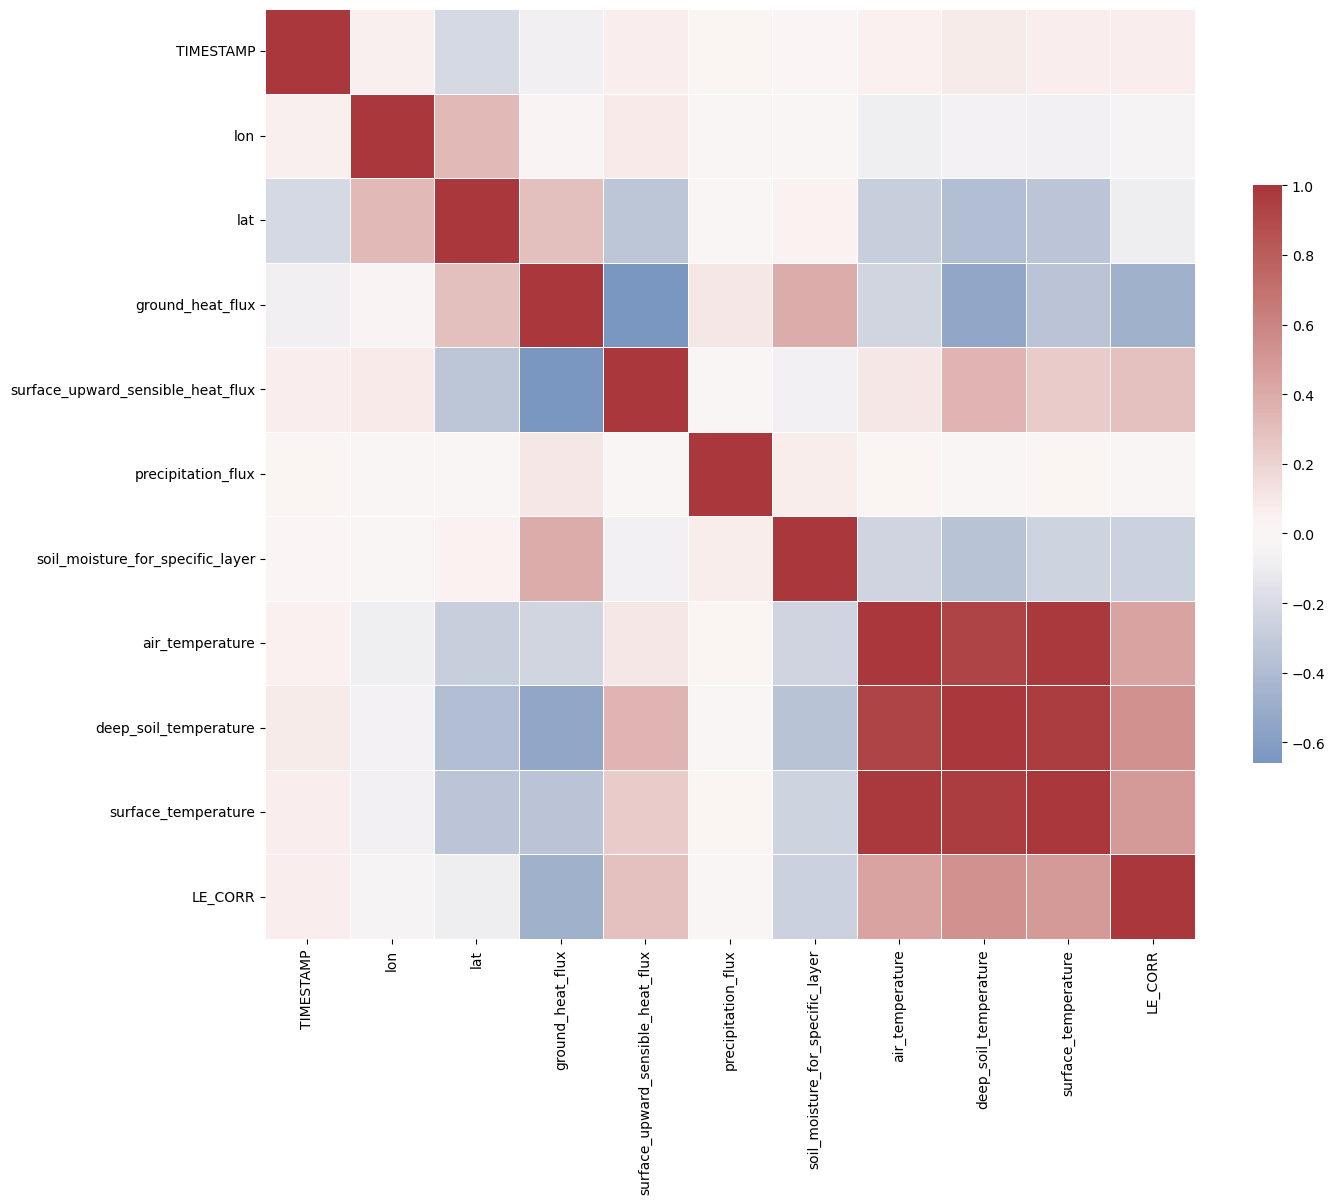

In [971]:
# correlation map of variables
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), center=0, cmap='vlag',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [988]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [978]:
dataset.sort_index(level='TIMESTAMP',inplace=True)

In [984]:
train, test = train_test_split(dataset, test_size=0.1, shuffle=False)

In [987]:
print(f'Training set contains {len(train)} rows, test set contains {len(test)}.')

Training set contains 401026 rows, test set contains 44559.


In [998]:
# baseline model
y_test = test.LE_CORR
y_pred = [train.LE_CORR.median()] * len(y_test)
print(f'Baseline R2: {r2_score(y_test, y_pred):.2f}')
print(f'Baseline MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Baseline RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}')

Baseline R2: -0.05
Baseline MAE: 33.11
Baseline RMSE: 40.45


In [991]:
X_train = train.drop(columns='LE_CORR')
y_train = train.LE_CORR
X_test = test.drop(columns='LE_CORR')
y_test = test.LE_CORR

In [992]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict

In [1004]:
model = RandomForestRegressor()

In [999]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
print(f'Average R2 coefficient: {scores["test_r2"].mean():.2f} with standard deviation {scores["test_r2"].std():.2f}.')
print(f'Average MAE: {scores["test_neg_mean_absolute_error"].mean():.2f} with standard deviation {scores["test_neg_mean_absolute_error"].std():.2f}.')
print(f'Average RMSE: {scores["test_neg_root_mean_squared_error"].mean():.2f} with standard deviation {scores["test_neg_root_mean_squared_error"].std():.2f}.')

Average R2 coefficient: 0.13 with standard deviation 0.16.
Average MAE: -26.32 with standard deviation 2.88.
Average RMSE: -37.15 with standard deviation 3.91.


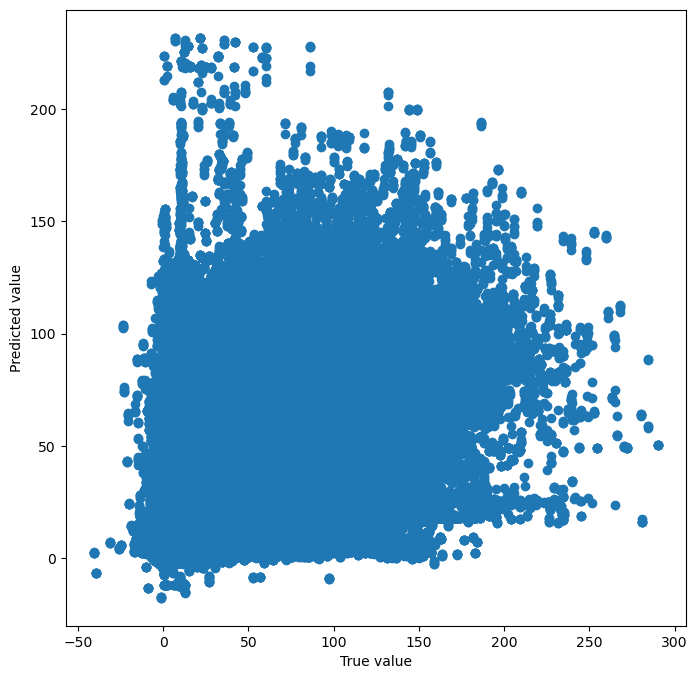

In [1000]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)
plt.figure(figsize=(8,8))
plt.scatter(y_train, y_pred)
plt.xlabel("True value")
plt.ylabel("Predicted value");

In [1001]:
# performs recursive feature elimination (RFE) to determine best features
from sklearn.feature_selection import RFECV
selector = RFECV(model, step=1, cv=5) # removes 1 feature at a time.
selector = selector.fit(X_train, y_train)
print(f'Predictors to keep: {list(X_train.columns[selector.support_])}.')
print(f'Predictors to discard: {list(X_train.columns[~selector.support_])}.')

Predictors to keep: ['TIMESTAMP', 'deep_soil_temperature'].
Predictors to discard: ['lon', 'lat', 'ground_heat_flux', 'surface_upward_sensible_heat_flux', 'precipitation_flux', 'soil_moisture_for_specific_layer', 'air_temperature', 'surface_temperature'].


In [1003]:
rfe_scores = cross_validate(selector, X_train, y_train, cv=5, scoring=scoring)
print(f'Average R2 coefficient: {rfe_scores["test_r2"].mean():.2f} with standard deviation {rfe_scores["test_r2"].std():.2f}.')
print(f'Average MAE: {rfe_scores["test_neg_mean_absolute_error"].mean():.2f} with standard deviation {rfe_scores["test_neg_mean_absolute_error"].std():.2f}.')
print(f'Average RMSE: {rfe_scores["test_neg_root_mean_squared_error"].mean():.2f} with standard deviation {rfe_scores["test_neg_root_mean_squared_error"].std():.2f}.')


Average R2 coefficient: 0.01 with standard deviation 0.23.
Average MAE: -27.83 with standard deviation 3.54.
Average RMSE: -39.51 with standard deviation 4.30.


In [1006]:
from sklearn.feature_selection import SequentialFeatureSelector

In [1007]:
# performs sequential feature selection (SFS) to determine best features
sfs = SequentialFeatureSelector(model, direction='forward', cv=5)
sfs.fit(X_train, y_train)
print(f'Predictors to keep: {list(X_train.columns[sfs.get_support()])}.')
print(f'Predictors to discard: {list(X_train.columns[~sfs.get_support()])}.')

C:\Users\andersg\AppData\Local\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:206: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Predictors to keep: ['TIMESTAMP', 'ground_heat_flux', 'surface_upward_sensible_heat_flux', 'precipitation_flux', 'soil_moisture_for_specific_layer'].
Predictors to discard: ['lon', 'lat', 'air_temperature', 'deep_soil_temperature', 'surface_temperature'].


In [1008]:
reduced_X_train = sfs.transform(X_train)
reduced_X_test = sfs.transform(X_test)
sfs_scores = cross_validate(model, reduced_X_train, y_train, cv=5, scoring=scoring)
print(f'Average R2 coefficient: {sfs_scores["test_r2"].mean():.2f} with standard deviation {sfs_scores["test_r2"].std():.2f}.')
print(f'Average MAE: {sfs_scores["test_neg_mean_absolute_error"].mean():.2f} with standard deviation {sfs_scores["test_neg_mean_absolute_error"].std():.2f}.')
print(f'Average RMSE: {sfs_scores["test_neg_root_mean_squared_error"].mean():.2f} with standard deviation {sfs_scores["test_neg_root_mean_squared_error"].std():.2f}.')

Average R2 coefficient: 0.30 with standard deviation 0.09.
Average MAE: -23.71 with standard deviation 1.60.
Average RMSE: -33.32 with standard deviation 2.40.


In [1005]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [1009]:
# uses random search to find best hyperparameters
parameters = {'n_estimators': randint(10, 200), # the number of trees in the forest
              'max_features': randint(2, 8), # how many features to consider when splitting
              'max_depth' : randint(5, 50), # maximum depth of each tree
              }
random_search = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5, n_jobs=-2,
                           scoring='neg_mean_absolute_error', verbose=2,
                           n_iter=200) # how many combinations to try.
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-2,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BD5F136DD0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BD5F136560>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BD5F117730>},
                   scoring='neg_mean_absolute_error', verbose=2)

In [1011]:
random_search.best_params_

{'max_depth': 7, 'max_features': 2, 'n_estimators': 67}

In [1013]:
model = random_search.best_estimator_

In [1014]:
tuned_scores = cross_validate(model, reduced_X_train, y_train, cv=5, scoring=scoring)
print(f'Average R2 coefficient: {tuned_scores["test_r2"].mean():.2f} with standard deviation {tuned_scores["test_r2"].std():.2f}.')
print(f'Average MAE: {tuned_scores["test_neg_mean_absolute_error"].mean():.2f} with standard deviation {tuned_scores["test_neg_mean_absolute_error"].std():.2f}.')
print(f'Average RMSE: {tuned_scores["test_neg_root_mean_squared_error"].mean():.2f} with standard deviation {tuned_scores["test_neg_root_mean_squared_error"].std():.2f}.')

Average R2 coefficient: 0.24 with standard deviation 0.05.
Average MAE: -26.87 with standard deviation 1.90.
Average RMSE: -34.97 with standard deviation 3.03.
